audio_16k contiene los audios en formato .wav

In [16]:
import zipfile
import os

zip_file_path = "vs_release_16k.zip"
destination_directory = "data/"
folders_to_extract = ["audio_16k/", "meta/"]

if not os.path.exists(destination_directory):
    with zipfile.ZipFile(zip_file_path, 'r') as zf:
        for file in zf.namelist():
            if any(file.startswith(folder) for folder in folders_to_extract):
                zf.extract(file, destination_directory)

m0188_0_cough.wav  
m -> male  
cough -> cough  
0 -> index of that cough (individuals may have more than 1 cough registered)

In [19]:
import os
import numpy as np
import pandas as pd
import wave

audio_dir = "data/audio_16k"

data = []
for file in os.listdir(audio_dir):
    with wave.open("/".join((audio_dir, file)), 'rb') as wf:
        num_frames = wf.getnframes()
        frames = wf.readframes(num_frames)
        wave_array = np.frombuffer(frames, dtype=np.int16)
        wave_name = os.path.splitext(file)[0]
        data.append((wave_name, wave_array))
data

KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import pandas as pd
import wave
from concurrent.futures import ThreadPoolExecutor

audio_dir = "data/audio_16k"

def read_wav(file):
    with wave.open(file.path, 'rb') as wf:
        num_frames = wf.getnframes()
        frames = wf.readframes(num_frames)
        wave_array = np.frombuffer(frames, dtype=np.int16)
        wave_name = os.path.splitext(file.name)[0]
        return (wave_name, wave_array)

# Obtener la lista de archivos usando os.scandir()
files = [file for file in os.scandir(audio_dir) if file.is_file()]

# Leer archivos WAV en paralelo
with ThreadPoolExecutor() as executor:
    data = list(executor.map(read_wav, files))

# Crear DataFrame
df = pd.DataFrame(data, columns=['wave_name', 'wave_array'])


In [3]:
example = 'data/audio_16k/f0003_0_cough.wav'

In [5]:
import numpy
from wave import open as open_wave
waveFile = open_wave(example,'rb')
nframes = waveFile.getnframes()
wavFrames = waveFile.readframes(nframes)
ys = numpy.frombuffer(wavFrames, dtype=numpy.int16)
ys

array([38, 53, 50, ..., 19, 16,  9], dtype=int16)

In [8]:
import numpy as np
with open_wave(example, 'rb') as wf:
    num_frames = wf.getnframes()
    frames = wf.readframes(num_frames)
    wave_array = np.frombuffer(frames, dtype=numpy.int16)
ys

array([38, 53, 50, ..., 19, 16,  9], dtype=int16)

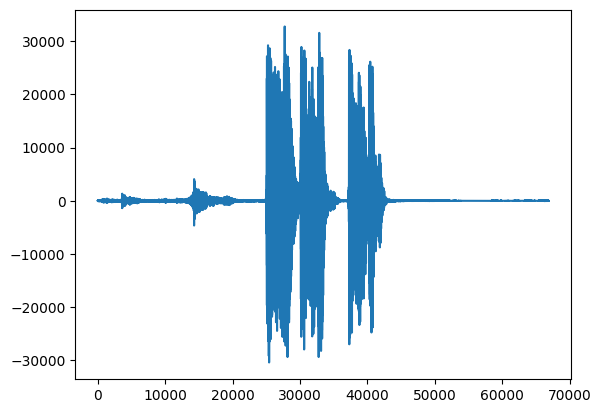

In [6]:
import matplotlib.pyplot as plt
plt.plot(ys)
plt.show()

In [7]:
from scipy.io import wavfile

sampling_rate, audio_data = wavfile.read(example)
sampling_rate, audio_data

(16000, array([38, 53, 50, ..., 19, 16,  9], dtype=int16))